Import Statements

In [4]:
import numpy as np
import json
import csv
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt

Naive Bayes Class

In [34]:
class NaiveBayes(object):
    
    def __init__(self):
        # Load test file
        csv_file = open('KickStarterData.csv', encoding="utf-8")
        csv_reader = csv.reader(csv_file, delimiter=',')

        #print(len(list(csv_reader)))
        
        data_arr = np.empty((10, 15), dtype=object)
        counter = 0
        for row in csv_reader:
            if (counter < 10):
                temp_arr = np.array(row)
                data_arr[counter] = temp_arr
                counter += 1


In [35]:
nb = NaiveBayes()

331676


In [2]:
class Cleaning(object):
    #class to handle cleaning data (standardizing features, dimensionality reduction, etc.)
    
    def __init__(self):
        self.U = None
        self.V = None
        self.S = None

    #PCA for dimensionality reduction of the dataset
    def pca(self, X, var = False, k=2):
        """
        ARGS:
            X: (N X D) data set as a numpy array, uncentered
            var: whether to use retained variance or number of features as the basis of reduction
            k: if var=FALSE, k is the number of features to be kept. if var=TRUE, k is the retained variance as a decimal

        RETURNS:
            new_data: dataset (as a numpy array) obtained by applying PCA on the original dataset

        SETS:
            self.U: (N, min(N,D))
            self.V: (min(N,D), D)
            self.S: (min(N,D), ) 
        """

        #center the data set
        centeredData = X - np.mean(X, axis=0)
        self.U, self.S, self.V = np.linalg.svd(centeredData, full_matrices = False)

        #if var== False, do PCA based on the specified number of features
        if (var == False):
            #if k not entered correctly (less than one feature entered), assume default number of features
            if (k < 1):
                k = 2
            self.U = self.U[:,0:k]
            self.S = self.S[0:k]
            self.V = self.V[0:k,:]
            new_data = np.matmul(centeredData, (self.V).T)
        
        #if var==True, do PCA based on the specified number of features
        else:
            #if k not entered correctly (greater than 100%), assume default variance
            if (k >= 1):
                k = .99
            new_data = np.matmul(centeredData, (self.V).T)
            origVar = np.sum(np.square(self.S))
            ssquared = np.square(self.S)
            for i in range(np.shape(centeredData)[1]):
                var = np.sum(ssquared[0:i])/origVar
                if (var >= k):
                    self.S = self.S[0:i]
                    self.U = self.U[:,0:i]
                    self.V = self.V[0:i,:]
                    new_data= np.matmul(centeredData, (self.V).T)
        
        return new_data




['2147476221', '804', '39', '20.76', '75000', '4.055226667', '1']


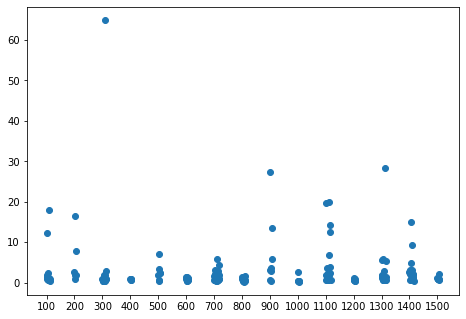

In [10]:
class Visualize(object):
    def __init__(self):
        csv_file = open('KickStarterData_nb.csv', encoding="utf-8")
        csv_reader = csv.reader(csv_file, delimiter=',')

        #print((list(csv_reader)[0]))
        self.csv_list = list(csv_reader)
        #self.data_array = np.array(csv_list)
        #print(np.shape(self.data_array))
        #self.csv_list.pop[0]
        
        # self.data_arr = np.empty((len(list(csv_reader)), 15), dtype=object)
        # counter = 0
        # for row in csv_reader:
        #     temp_arr = np.array(row)
        #     self.data_arr[counter] = temp_arr
        #     counter += 1
        #     print("in for loop")
    
    def average(self):
        #category code per percent of goal reached per period of time (normalized)
        #print(self.csv_file[0])
        #print(type(self.csv_file[0]))
        
        # rows = np.shape(self.data_arr)[0]
        # print(self.data_arr[0:2])
        
        x = []
        x_dict = {}
        y = []
        counter = 0
        print(self.csv_list[1])
        for rowlist in self.csv_list:
            if counter == 0:
                counter += 1
                continue
            if (float(rowlist[1]) in x_dict):
                x_dict[float(rowlist[1])].append(float(rowlist[5]))
            else:
                x_dict[float(rowlist[1])] = [float(rowlist[5])]
        for key in x_dict.keys():
            x.append(key)
            y.append(sum(x_dict[key])/len(x_dict[key]))
        


        
        figure = plt.figure()
        axis = figure.add_axes([0,0,1,1])
        axis.xaxis.set_ticks(np.arange(100, 1600, 100))
        axis.scatter(x, y)
        plt.show() 

    def count(self):
        x_dict = {}
        counter = 0
        print(self.csv_list[1])
        for rowlist in self.csv_list:
            if counter == 0:
                counter += 1
                continue
            if ((float(rowlist[1])//100)*100 in x_dict):
                x_dict[(float(rowlist[1])//100)*100] += 1
            else:
                x_dict[(float(rowlist[1])//100)*100] = 1
        x = x_dict.keys()
        y = x_dict.values()
        
        figure = plt.figure()
        axis = figure.add_axes([0,0,1,1])
        axis.xaxis.set_ticks(np.arange(100, 1600, 100))
        axis.bar(x, y)
        plt.show() 

vis = Visualize()
vis.average()
        
        
        